In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import random

In [2]:
df = pd.read_excel(r'DataScientistTask_Dataset.xlsx')
print(df)

          WellID      BVHH FormationAlias       NioGOR       CodGOR  \
0      500109742  1.105028       NIOBRARA  1687.414535          NaN   
1      500109753  0.644480       NIOBRARA  2267.667384          NaN   
2      500109754  0.620268       NIOBRARA  2368.236087          NaN   
3      500109760  0.649670       NIOBRARA   333.876618          NaN   
4      500109772  1.423475       NIOBRARA  3608.065949  3199.962930   
...          ...       ...            ...          ...          ...   
9201  4902129125       NaN         CODELL  1190.578936   949.853322   
9202  4902129224       NaN         CODELL          NaN   397.429199   
9203  4902129225       NaN         CODELL          NaN   336.475960   
9204  4902129416       NaN         CODELL          NaN   519.208816   
9205  4902129425       NaN         CODELL          NaN   472.746854   

      LateralLength  ProppantPerFoot  FluidPerFoot  LeftDistance  \
0            8084.0      1256.308758   1234.370856           NaN   
1          

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9206 entries, 0 to 9205
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WellID              9206 non-null   int64  
 1   BVHH                7565 non-null   float64
 2   FormationAlias      9206 non-null   object 
 3   NioGOR              8709 non-null   float64
 4   CodGOR              7538 non-null   float64
 5   LateralLength       9206 non-null   float64
 6   ProppantPerFoot     8974 non-null   float64
 7   FluidPerFoot        8942 non-null   float64
 8   LeftDistance        6758 non-null   float64
 9   LeftNeighbourType   9206 non-null   object 
 10  RightDistance       6778 non-null   float64
 11  RightNeighbourType  9206 non-null   object 
 12  TVD                 8893 non-null   float64
 13  NormalizedOilEUR    9206 non-null   float64
 14  NormalizedGasEUR    9206 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.1+ 

In [4]:
df.describe()  

,WellID,BVHH,NioGOR,CodGOR,LateralLength,ProppantPerFoot,FluidPerFoot,LeftDistance,RightDistance,TVD,NormalizedOilEUR,NormalizedGasEUR
count,9.206000e+03,7565.000000,8709.000000,7538.000000,9206.000000,8974.000000,8942.000000,6758.000000,6778.000000,8893.000000,9206.000000,9206.000000
mean,7.183554e+08,1.031013,4699.704950,4219.441933,6970.061820,1013.557032,1035.336411,864.819473,877.969608,7013.938041,19.033831,105.802192
std,9.295257e+08,0.370794,12584.166286,3306.948828,2673.528748,529.759630,629.271011,925.304147,947.646937,616.775613,8.187220,66.225371
min,5.001097e+08,-0.125405,85.752059,336.475960,1749.000000,0.000000,0.001171,14.000000,14.000000,2610.000000,0.000000,0.000000
25%,5.123379e+08,0.750481,2189.721498,2314.007323,4349.250000,725.260473,703.318099,343.000000,344.000000,6680.000000,13.646120,51.336490
50%,5.123416e+08,1.020468,3448.129246,3406.380480,6668.500000,923.412724,862.066743,590.000000,591.000000,7061.000000,17.722519,97.304146
75%,5.123458e+08,1.310162,4900.703302,5001.128167,9596.000000,1153.233929,1207.024954,901.750000,903.000000,7347.000000,23.020425,151.120432
max,4.902129e+09,2.260032,357894.183679,26193.592720,16676.000000,10217.314931,20117.640692,5275.000000,5276.000000,9793.000000,96.959244,465.849396


In [5]:
df.head()

,WellID,BVHH,FormationAlias,NioGOR,CodGOR,LateralLength,ProppantPerFoot,FluidPerFoot,LeftDistance,LeftNeighbourType,RightDistance,RightNeighbourType,TVD,NormalizedOilEUR,NormalizedGasEUR
0,500109742,1.105028,NIOBRARA,1687.414535,NaN,8084.0,1256.308758,1234.370856,NaN,NoNeighbour,NaN,NoNeighbour,7501.0,15.234785,37.674048
1,500109753,0.644480,NIOBRARA,2267.667384,NaN,3912.0,742.842536,784.000000,NaN,NoNeighbour,1330.0,Codeveloped,7551.0,5.327198,11.627301
2,500109754,0.620268,NIOBRARA,2368.236087,NaN,4137.0,912.738700,1127.047136,1330.0,Codeveloped,NaN,NoNeighbour,7594.0,5.629925,14.544356
3,500109760,0.649670,NIOBRARA,333.876618,NaN,4161.0,914.683970,691.026676,NaN,NoNeighbour,NaN,NoNeighbour,7391.0,8.240087,7.012257
4,500109772,1.423475,NIOBRARA,3608.065949,3199.96293,4418.0,747.271842,928.239928,NaN,NoNeighbour,NaN,NoNeighbour,7838.0,15.374830,51.169534


In [6]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)
# checking if the column name has any extra spaces 

Numerical columns: 
 Index(['WellID', 'BVHH', 'NioGOR', 'CodGOR', 'LateralLength',
       'ProppantPerFoot', 'FluidPerFoot', 'LeftDistance', 'RightDistance',
       'TVD', 'NormalizedOilEUR', 'NormalizedGasEUR'],
      dtype='object')
Categorical columns: 
 Index(['FormationAlias', 'LeftNeighbourType', 'RightNeighbourType'], dtype='object')


In [14]:
print(df.isna().sum())
print(df.shape)

WellID                   0
BVHH                  1641
FormationAlias           0
NioGOR                 497
CodGOR                1668
LateralLength            0
ProppantPerFoot        232
FluidPerFoot           264
LeftDistance          2448
LeftNeighbourType        0
RightDistance         2428
RightNeighbourType       0
TVD                    313
NormalizedOilEUR         0
NormalizedGasEUR         0
dtype: int64
(9206, 15)


In [15]:
# We have enough points, so we can drop the null values from this dataset.
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.shape) # After removing null values

(4266, 15)


In [16]:
# Train test split
X=df.drop(columns=['WellID','FormationAlias','LeftNeighbourType','RightNeighbourType','NormalizedOilEUR','NormalizedGasEUR'])
yo=df[['NormalizedOilEUR']]
yg=df[['NormalizedGasEUR']]

In [20]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# # generate dataset
# X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression,k='all')

In [21]:
# apply feature selection
X_selected = fs.fit_transform(X, yo )
print(X_selected.shape)

(4266, 9)


C:\Users\Decimal\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
X_selected

array([[1.39283822e+00, 3.76982208e+03, 3.17178799e+03, ...,
        6.01000000e+02, 5.69000000e+02, 7.94900000e+03],
       [1.45668824e+00, 1.89944049e+03, 1.42359726e+03, ...,
        7.39000000e+02, 2.16000000e+02, 7.58800000e+03],
       [7.43616667e-01, 2.01592193e+03, 1.93485135e+03, ...,
        7.61000000e+02, 1.83800000e+03, 7.96400000e+03],
       ...,
       [1.01080313e+00, 6.66421955e+02, 8.37587977e+02, ...,
        1.92200000e+03, 1.04900000e+03, 8.72400000e+03],
       [1.19550156e+00, 9.29628018e+02, 9.14245976e+02, ...,
        1.30300000e+03, 1.23200000e+03, 8.48000000e+03],
       [1.20229844e+00, 8.89401624e+02, 6.11174397e+02, ...,
        3.17900000e+03, 8.73000000e+02, 8.79500000e+03]])

In [ ]:
# Replace using mean 
for i in df.columns.drop('WellID'):
    df[i].fillna(df[i].mean(), inplace = True)

In [ ]:
print(df.isna().sum())
print(df.shape)

C:\Users\decim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


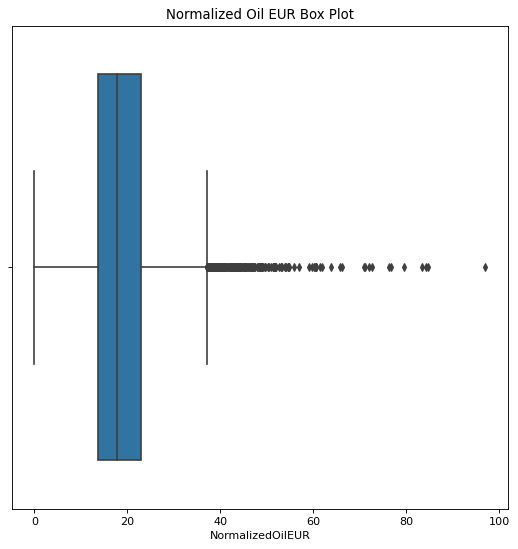

In [8]:
# Let's check the distribution of y variable (Life Expectancy)
plt.figure(figsize=(8,8), dpi= 80)
sns.boxplot(df['NormalizedOilEUR'])
plt.title('Normalized Oil EUR Box Plot')
plt.show()

C:\Users\decim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


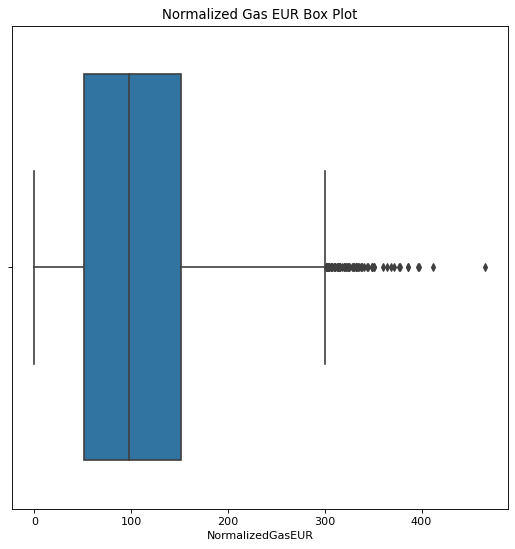

In [9]:
# Let's check the distribution of y variable (Life Expectancy)
plt.figure(figsize=(8,8), dpi= 80)
sns.boxplot(df['NormalizedGasEUR'])
plt.title('Normalized Gas EUR Box Plot')
plt.show()

In [ ]:


df.describe().NioGOR
sns.boxplot(df.NioGOR)
sns.distplot(df.NioGOR)
# without outliers
outlier_clean("NioGOR")
